Lectura de la variable **Patrimonio**, análisis y preprocesado

In [17]:
import pandas as pd
#from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.impute import KNNImputer
#from tabulate import tabulate


In [18]:
ruta="../../data/"
ficheroLectura=ruta+"patrimonio.csv"
ficheroEscritura=ruta+"patrimonioProcesado.csv"
patronColumnas="PT"

In [19]:
#Lectura del csv donde se encuentran los datos de la variable por años
#Se comprueba que no hay valores de ID de empresa duplicados


dfOriginal = pd.read_csv(ficheroLectura, decimal=',', dtype=float)
df = dfOriginal.filter(like=patronColumnas)
duplicados = dfOriginal['ID'].duplicated().any()
print(f"La columna ID tiene valores duplicados: {duplicados}")
print(f"Número de filas: {len(df)}")
print(df.head())


La columna ID tiene valores duplicados: False
Número de filas: 12266
       PT2011      PT2012      PT2013      PT2014      PT2015      PT2016  \
0   5152131.0   5279450.0   6627476.0   6820681.0   6670608.0   6557581.0   
1   3530980.0   4532003.0   5070418.0   5295751.0   5541097.0   5560420.0   
2    181325.0   -465628.0    467927.0   -245108.0   5221427.0  15915439.0   
3  45259208.0  49972342.0  48909547.0  46497465.0  31399703.0  35306879.0   
4  42722342.0  45463419.0  42564273.0  46288468.0  49759447.0  30781156.0   

       PT2017      PT2018      PT2019      PT2020      PT2021      PT2022  
0   7100101.0   7468100.0   7825087.0   4704891.0   6011816.0   5370270.0  
1   5826703.0   5614366.0   6061551.0   6462979.0   6920838.0   7856685.0  
2  10934379.0  11051108.0  11351899.0  11500972.0  11674483.0  11549730.0  
3  37369739.0  36506438.0  41945937.0  43950364.0  42867203.0  29033685.0  
4  30590956.0  29889305.0  30558658.0  31302868.0  32374733.0  24232533.0  


In [20]:
#se añade la columna del año faltante con valores nan

df.insert(loc=0, column='PT2010', value=np.nan)
df

,PT2010,PT2011,PT2012,PT2013,PT2014,PT2015,PT2016,PT2017,PT2018,PT2019,PT2020,PT2021,PT2022
0,NaN,5152131.0,5279450.0,6627476.0,6820681.0,6670608.0,6557581.0,7.100101e+06,7.468100e+06,7825087.0,4.704891e+06,6011816.0,5.370270e+06
1,NaN,3530980.0,4532003.0,5070418.0,5295751.0,5541097.0,5560420.0,5.826703e+06,5.614366e+06,6061551.0,6.462979e+06,6920838.0,7.856685e+06
2,NaN,181325.0,-465628.0,467927.0,-245108.0,5221427.0,15915439.0,1.093438e+07,1.105111e+07,11351899.0,1.150097e+07,11674483.0,1.154973e+07
3,NaN,45259208.0,49972342.0,48909547.0,46497465.0,31399703.0,35306879.0,3.736974e+07,3.650644e+07,41945937.0,4.395036e+07,42867203.0,2.903368e+07
4,NaN,42722342.0,45463419.0,42564273.0,46288468.0,49759447.0,30781156.0,3.059096e+07,2.988930e+07,30558658.0,3.130287e+07,32374733.0,2.423253e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12261,NaN,0.0,0.0,0.0,0.0,0.0,0.0,2.213440e+07,2.161109e+07,21647180.0,3.979122e+06,3736461.0,3.905674e+06
12262,NaN,0.0,0.0,0.0,0.0,0.0,0.0,9.575427e+05,3.514826e+06,5565970.0,6.296162e+06,6681001.0,9.276493e+06
12263,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.017428e+06,7.429446e+06,6020705.0,-4.268458e+06,4221851.0,4.603729e+06
12264,NaN,0.0,0.0,0.0,0.0,0.0,8623648.0,1.168908e+07,1.652192e+07,18764555.0,1.944381e+07,28010346.0,2.589487e+07


In [21]:
df.head(10)#muestro  las 10 primeras filas

,PT2010,PT2011,PT2012,PT2013,PT2014,PT2015,PT2016,PT2017,PT2018,PT2019,PT2020,PT2021,PT2022
0,NaN,5152131.0,5279450.0,6627476.0,6820681.0,6670608.0,6557581.0,7100101.0,7468100.0,7825087.0,4704891.0,6011816.0,5370270.0
1,NaN,3530980.0,4532003.0,5070418.0,5295751.0,5541097.0,5560420.0,5826703.0,5614366.0,6061551.0,6462979.0,6920838.0,7856685.0
2,NaN,181325.0,-465628.0,467927.0,-245108.0,5221427.0,15915439.0,10934379.0,11051108.0,11351899.0,11500972.0,11674483.0,11549730.0
3,NaN,45259208.0,49972342.0,48909547.0,46497465.0,31399703.0,35306879.0,37369739.0,36506438.0,41945937.0,43950364.0,42867203.0,29033685.0
4,NaN,42722342.0,45463419.0,42564273.0,46288468.0,49759447.0,30781156.0,30590956.0,29889305.0,30558658.0,31302868.0,32374733.0,24232533.0
5,NaN,5703773.0,5767983.0,5909729.0,6035625.0,6124479.0,10116999.0,9851230.0,9851230.0,14977536.0,15084858.0,15227859.0,15447651.0
6,NaN,9825523.0,9581142.0,9003027.0,8431204.0,8483016.0,6775150.0,6769927.0,6887974.0,6967025.0,7053083.0,7044043.0,6904424.0
7,NaN,90846968.0,91938829.0,94426368.0,87832644.0,60310617.0,57798459.0,67269101.0,75892591.0,92647978.0,90116406.0,105150272.0,127636129.0
8,NaN,1750487.0,1475686.0,1333080.0,1200449.0,8080139.0,8332821.0,8504913.0,7177867.0,3403963.0,3356562.0,3391203.0,3295110.0
9,NaN,24482288.0,24651770.0,27502063.0,35876567.0,39013528.0,25513442.0,25357399.0,26031381.0,25885310.0,25992177.0,28251227.0,24066922.0


In [22]:
# Contar valores nulos por columna
# Consideramos tanto los NaN como los 0 como valores faltantes para este cálculo

df.replace(0, np.nan, inplace=True)
porcentajeFaltantes = (df.isnull()).mean() * 100
print( "Porcentaje de datos faltantes por año:")
print(porcentajeFaltantes)





Porcentaje de datos faltantes por año:
PT2010    100.000000
PT2011     21.881624
PT2012     19.117887
PT2013     13.712702
PT2014      9.766835
PT2015      7.590086
PT2016      3.807272
PT2017      0.000000
PT2018      0.000000
PT2019      0.000000
PT2020      6.725909
PT2021      4.190445
PT2022      7.288440
dtype: float64


<ipython-input-22-f2345fe28886>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace(0, np.nan, inplace=True)


**Cálculo de outliers**

In [23]:
# Calcula el IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
limiteInferior = Q1 - 10 * IQR
limiteSuperior = Q3 + 10 * IQR

# Imprime los umbrales
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    print(f"Umbrales para {col}: Límite Inferior = {limiteInferior[col]}, Límite Superior = {limiteSuperior[col]}")

# Considerar como outlier aquellos valores que están fuera del rango de Q1 - 10*IQR y Q3 + 10*IQR
print("Numero de outliers por año")
outliers = ((df < (limiteInferior)) | (df > (limiteSuperior))).sum()


# Mostrar los outliers
print(outliers)

Umbrales para PT2010: Límite Inferior = nan, Límite Superior = nan
Umbrales para PT2011: Límite Inferior = -73920416.0, Límite Superior = 84139990.0
Umbrales para PT2012: Límite Inferior = -83865050.0, Límite Superior = 95521129.0
Umbrales para PT2013: Límite Inferior = -91689144.5, Límite Superior = 104467881.25
Umbrales para PT2014: Límite Inferior = -101222585.5, Límite Superior = 115341794.0
Umbrales para PT2015: Límite Inferior = -109823833.0, Límite Superior = 125475056.0
Umbrales para PT2016: Límite Inferior = -121176662.5, Límite Superior = 138849075.5
Umbrales para PT2017: Límite Inferior = -128267244.75, Límite Superior = 147163269.0
Umbrales para PT2018: Límite Inferior = -138248188.75, Límite Superior = 158607076.25
Umbrales para PT2019: Límite Inferior = -151747813.5, Límite Superior = 174129078.75
Umbrales para PT2020: Límite Inferior = -162931860.0, Límite Superior = 187172307.0
Umbrales para PT2021: Límite Inferior = -183841701.5, Límite Superior = 211140688.75
Umbrales

In [24]:
# Agrupar las filas por porcentaje de  valores  nan
nanRow = df.apply(lambda row: pd.isna(row).sum(), axis=1).value_counts().sort_index()

# Mostrar el resultado
print(nanRow)

1     7958
2     1483
3      893
4      689
5      510
6      396
7      216
8       85
9       31
10       5
dtype: int64


In [25]:
# Eliminar los valores  considerados outliers

df = df.where((df >= limiteInferior) & (df <= limiteSuperior), np.nan)


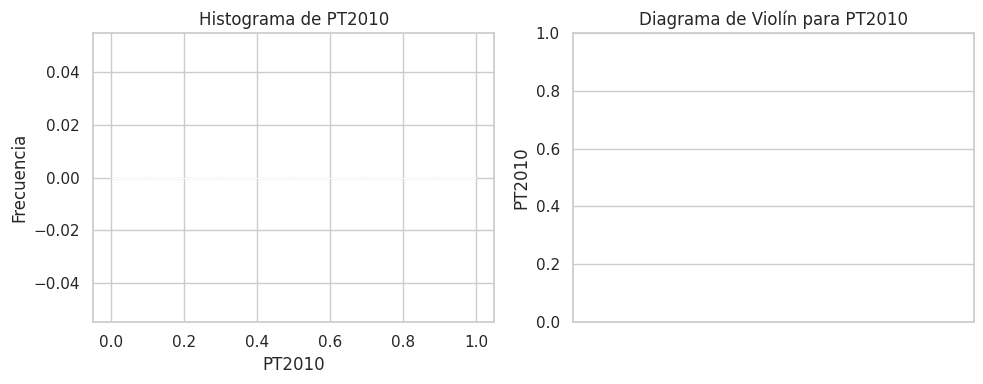

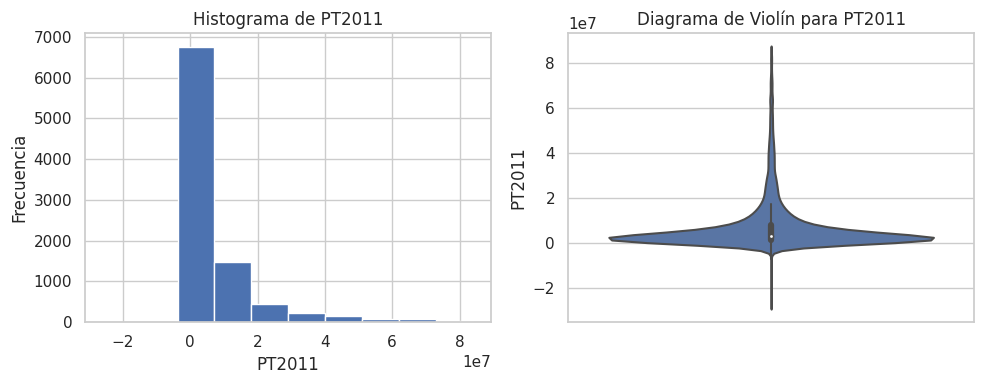

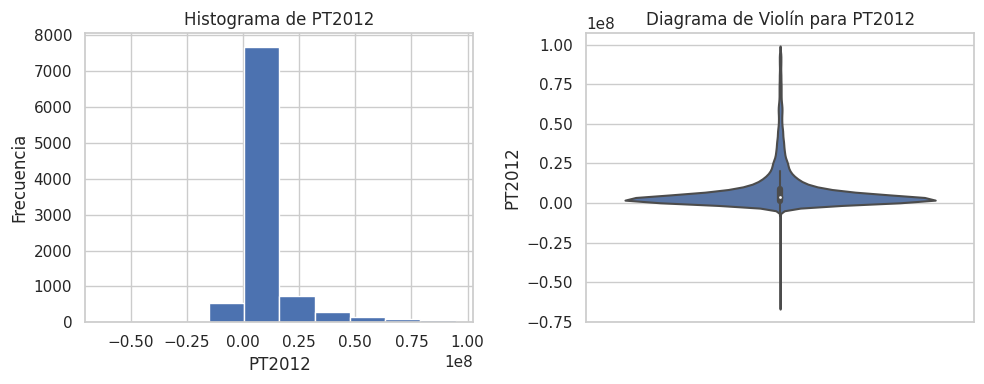

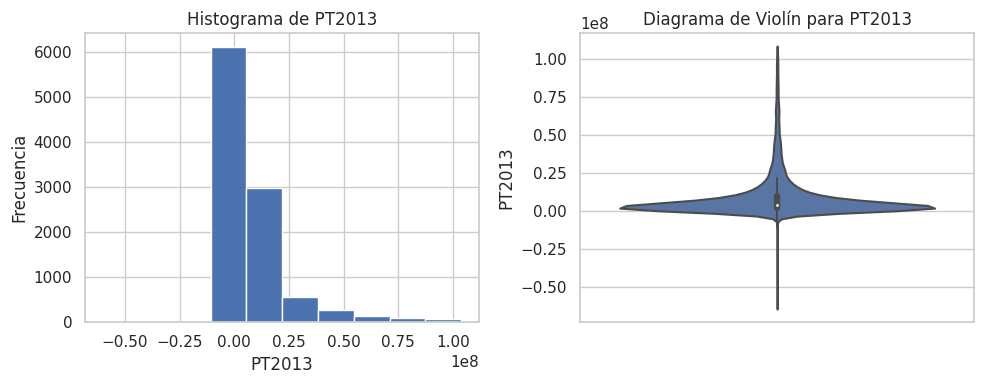

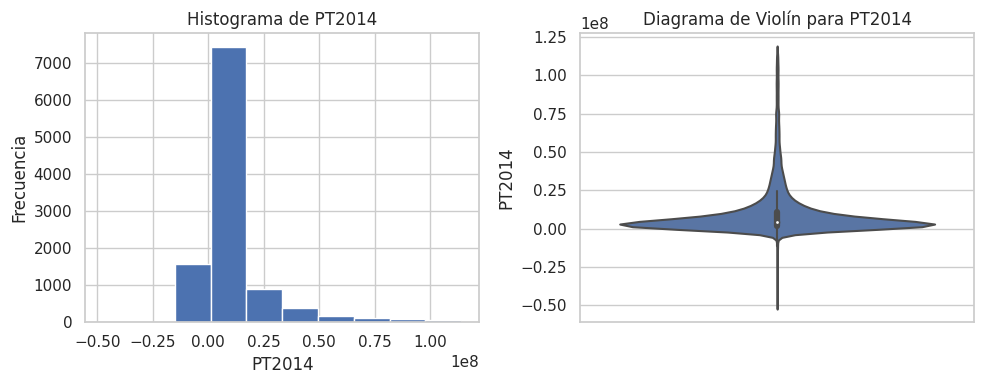

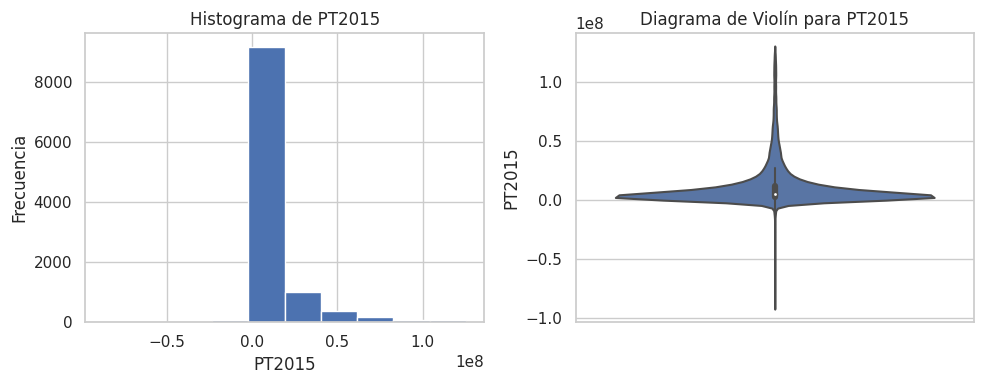

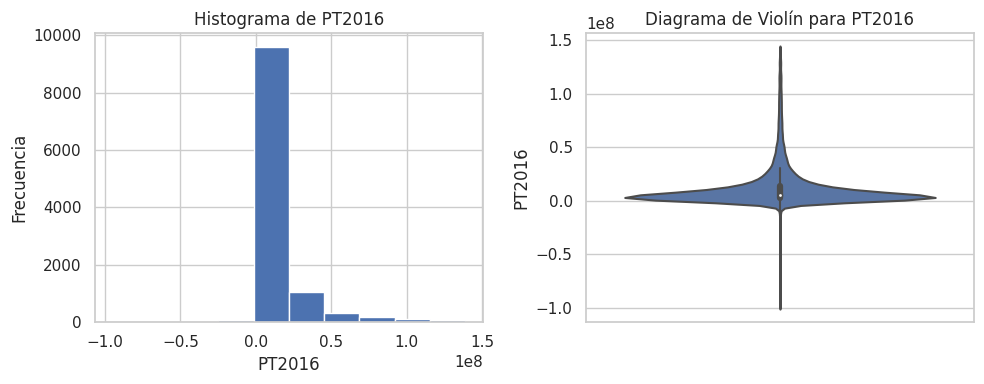

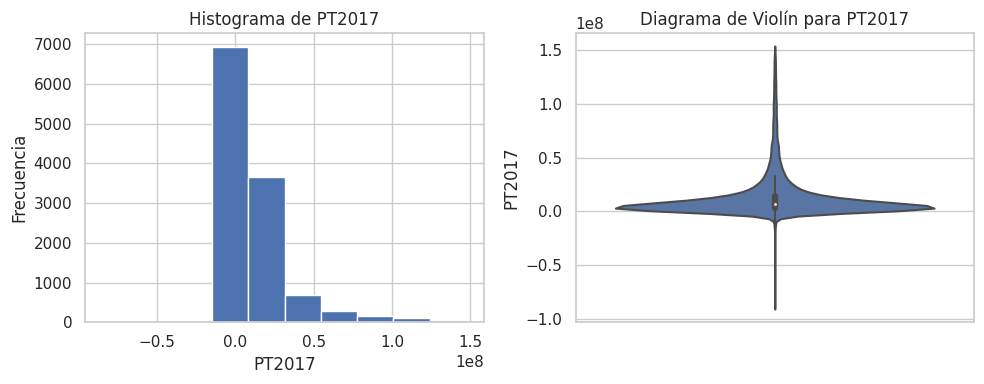

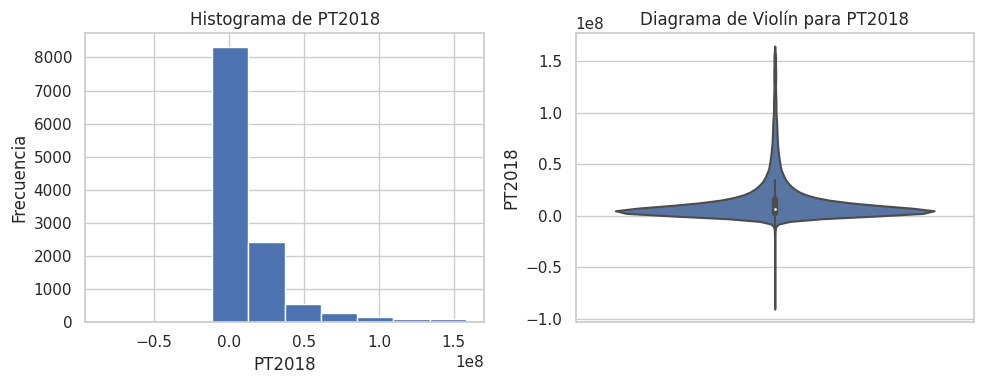

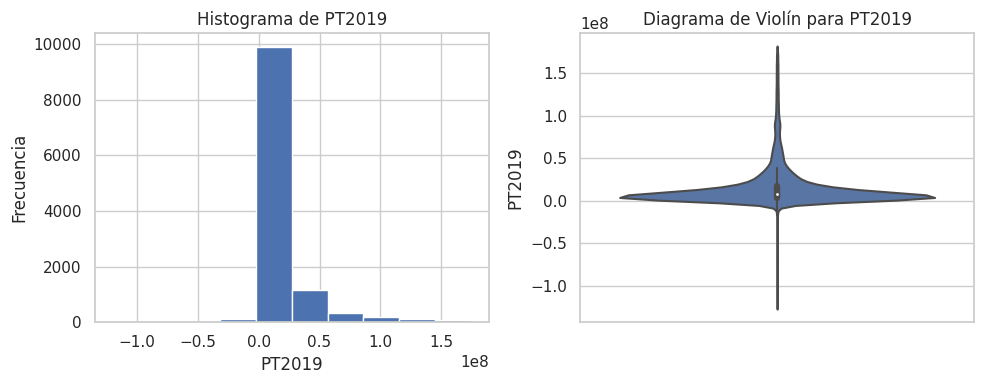

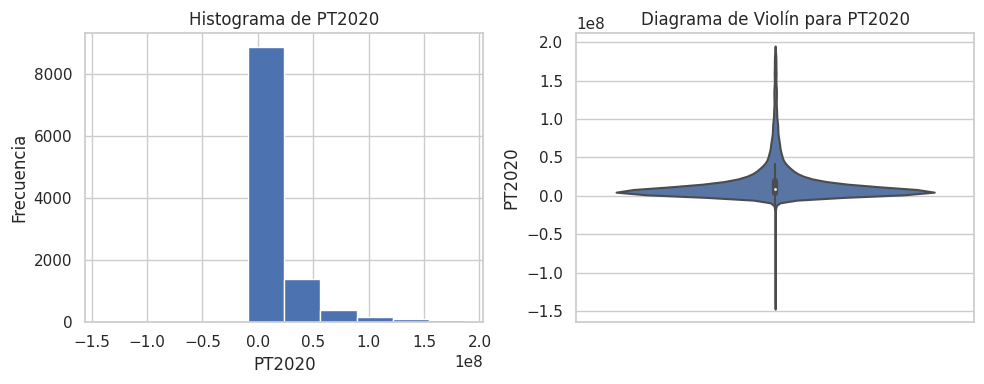

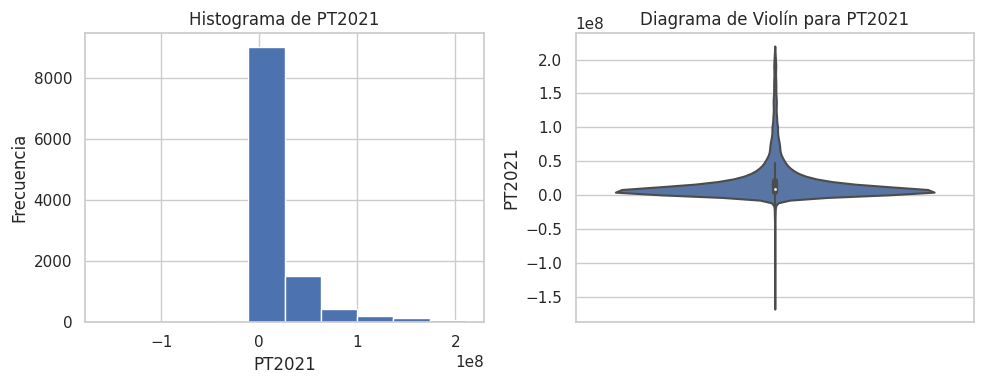

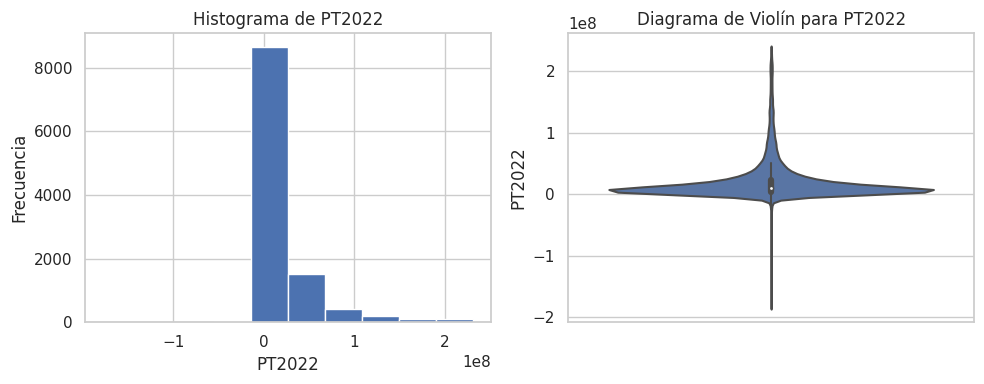

In [26]:
sns.set(style="whitegrid")

# Generar histogramas y diagramas de violín para cada columna
for columna in df.select_dtypes(include=['float64', 'int64']).columns:
    # Histograma
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, posición 1
    df[columna].hist()
    plt.title(f'Histograma de {columna}')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')

    # Diagrama de violín
    plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, posición 2
    sns.violinplot(data=df, y=columna)
    plt.title(f'Diagrama de Violín para {columna}')

    plt.tight_layout()
    plt.show()

In [27]:
# Agrupar las filas por numero de nan despues de haber marcado los outliers
nanRow = df.apply(lambda row: pd.isna(row).sum(), axis=1).value_counts().sort_index()

# Mostrar el resultado
print("Agrupación de las filas según el número de nan que tengan (de 0 a 13)")
print(nanRow)




Agrupación de las filas según el número de nan que tengan (de 0 a 13)
1     7528
2     1473
3      900
4      716
5      542
6      424
7      224
8      108
9       65
10      37
11      30
12      35
13     184
dtype: int64


**Imputación de valores nulos**


Se usará una interpolación por filas. Después de esta operación quedarán aún valores nan  en el caso de que no existan valores no nulos en los extremos de cada fila. Esos valores se imputarán  con la media de la fila. Para las filas que tengan todos su valores nulos, se les imputará lotro valor en el notebook de integración de datos.

In [28]:
df.head(20)

,PT2010,PT2011,PT2012,PT2013,PT2014,PT2015,PT2016,PT2017,PT2018,PT2019,PT2020,PT2021,PT2022
0,NaN,5152131.0,5279450.0,6627476.0,6820681.0,6670608.0,6557581.0,7100101.0,7468100.0,7825087.0,4704891.0,6.011816e+06,5370270.0
1,NaN,3530980.0,4532003.0,5070418.0,5295751.0,5541097.0,5560420.0,5826703.0,5614366.0,6061551.0,6462979.0,6.920838e+06,7856685.0
2,NaN,181325.0,-465628.0,467927.0,-245108.0,5221427.0,15915439.0,10934379.0,11051108.0,11351899.0,11500972.0,1.167448e+07,11549730.0
3,NaN,45259208.0,49972342.0,48909547.0,46497465.0,31399703.0,35306879.0,37369739.0,36506438.0,41945937.0,43950364.0,4.286720e+07,29033685.0
4,NaN,42722342.0,45463419.0,42564273.0,46288468.0,49759447.0,30781156.0,30590956.0,29889305.0,30558658.0,31302868.0,3.237473e+07,24232533.0
5,NaN,5703773.0,5767983.0,5909729.0,6035625.0,6124479.0,10116999.0,9851230.0,9851230.0,14977536.0,15084858.0,1.522786e+07,15447651.0
6,NaN,9825523.0,9581142.0,9003027.0,8431204.0,8483016.0,6775150.0,6769927.0,6887974.0,6967025.0,7053083.0,7.044043e+06,6904424.0
7,NaN,NaN,91938829.0,94426368.0,87832644.0,60310617.0,57798459.0,67269101.0,75892591.0,92647978.0,90116406.0,1.051503e+08,127636129.0
8,NaN,1750487.0,1475686.0,1333080.0,1200449.0,8080139.0,8332821.0,8504913.0,7177867.0,3403963.0,3356562.0,3.391203e+06,3295110.0
9,NaN,24482288.0,24651770.0,27502063.0,35876567.0,39013528.0,25513442.0,25357399.0,26031381.0,25885310.0,25992177.0,2.825123e+07,24066922.0


In [29]:
df = df.interpolate(method='linear', axis=1, inplace=False)
df.head(20)

,PT2010,PT2011,PT2012,PT2013,PT2014,PT2015,PT2016,PT2017,PT2018,PT2019,PT2020,PT2021,PT2022
0,NaN,5152131.0,5279450.0,6627476.0,6820681.0,6670608.0,6557581.0,7100101.0,7468100.0,7825087.0,4.704891e+06,6.011816e+06,5370270.0
1,NaN,3530980.0,4532003.0,5070418.0,5295751.0,5541097.0,5560420.0,5826703.0,5614366.0,6061551.0,6.462979e+06,6.920838e+06,7856685.0
2,NaN,181325.0,-465628.0,467927.0,-245108.0,5221427.0,15915439.0,10934379.0,11051108.0,11351899.0,1.150097e+07,1.167448e+07,11549730.0
3,NaN,45259208.0,49972342.0,48909547.0,46497465.0,31399703.0,35306879.0,37369739.0,36506438.0,41945937.0,4.395036e+07,4.286720e+07,29033685.0
4,NaN,42722342.0,45463419.0,42564273.0,46288468.0,49759447.0,30781156.0,30590956.0,29889305.0,30558658.0,3.130287e+07,3.237473e+07,24232533.0
5,NaN,5703773.0,5767983.0,5909729.0,6035625.0,6124479.0,10116999.0,9851230.0,9851230.0,14977536.0,1.508486e+07,1.522786e+07,15447651.0
6,NaN,9825523.0,9581142.0,9003027.0,8431204.0,8483016.0,6775150.0,6769927.0,6887974.0,6967025.0,7.053083e+06,7.044043e+06,6904424.0
7,NaN,NaN,91938829.0,94426368.0,87832644.0,60310617.0,57798459.0,67269101.0,75892591.0,92647978.0,9.011641e+07,1.051503e+08,127636129.0
8,NaN,1750487.0,1475686.0,1333080.0,1200449.0,8080139.0,8332821.0,8504913.0,7177867.0,3403963.0,3.356562e+06,3.391203e+06,3295110.0
9,NaN,24482288.0,24651770.0,27502063.0,35876567.0,39013528.0,25513442.0,25357399.0,26031381.0,25885310.0,2.599218e+07,2.825123e+07,24066922.0


In [30]:
# Después de intentar la interpolación se imputa la media  de los valores de una fila  a los na consecutivos que resten
df = df.apply(lambda row: row.fillna(row.mean()), axis=1)
df.head(20)

,PT2010,PT2011,PT2012,PT2013,PT2014,PT2015,PT2016,PT2017,PT2018,PT2019,PT2020,PT2021,PT2022
0,6.299016e+06,5.152131e+06,5279450.0,6627476.0,6820681.0,6670608.0,6557581.0,7100101.0,7468100.0,7825087.0,4.704891e+06,6.011816e+06,5370270.0
1,5.689483e+06,3.530980e+06,4532003.0,5070418.0,5295751.0,5541097.0,5560420.0,5826703.0,5614366.0,6061551.0,6.462979e+06,6.920838e+06,7856685.0
2,7.428163e+06,1.813250e+05,-465628.0,467927.0,-245108.0,5221427.0,15915439.0,10934379.0,11051108.0,11351899.0,1.150097e+07,1.167448e+07,11549730.0
3,4.075154e+07,4.525921e+07,49972342.0,48909547.0,46497465.0,31399703.0,35306879.0,37369739.0,36506438.0,41945937.0,4.395036e+07,4.286720e+07,29033685.0
4,3.637735e+07,4.272234e+07,45463419.0,42564273.0,46288468.0,49759447.0,30781156.0,30590956.0,29889305.0,30558658.0,3.130287e+07,3.237473e+07,24232533.0
5,1.000825e+07,5.703773e+06,5767983.0,5909729.0,6035625.0,6124479.0,10116999.0,9851230.0,9851230.0,14977536.0,1.508486e+07,1.522786e+07,15447651.0
6,7.810462e+06,9.825523e+06,9581142.0,9003027.0,8431204.0,8483016.0,6775150.0,6769927.0,6887974.0,6967025.0,7.053083e+06,7.044043e+06,6904424.0
7,8.645631e+07,8.645631e+07,91938829.0,94426368.0,87832644.0,60310617.0,57798459.0,67269101.0,75892591.0,92647978.0,9.011641e+07,1.051503e+08,127636129.0
8,4.275190e+06,1.750487e+06,1475686.0,1333080.0,1200449.0,8080139.0,8332821.0,8504913.0,7177867.0,3403963.0,3.356562e+06,3.391203e+06,3295110.0
9,2.771867e+07,2.448229e+07,24651770.0,27502063.0,35876567.0,39013528.0,25513442.0,25357399.0,26031381.0,25885310.0,2.599218e+07,2.825123e+07,24066922.0


In [31]:
#se añada al dataset procesado la columna con el ID de la empresa, que se había prescindido de ella en la lectura del csv original
df.insert(0, "ID", dfOriginal["ID"].copy().astype(int))
df.head(20)

,ID,PT2010,PT2011,PT2012,PT2013,PT2014,PT2015,PT2016,PT2017,PT2018,PT2019,PT2020,PT2021,PT2022
0,233151,6.299016e+06,5.152131e+06,5279450.0,6627476.0,6820681.0,6670608.0,6557581.0,7100101.0,7468100.0,7825087.0,4.704891e+06,6.011816e+06,5370270.0
1,233207,5.689483e+06,3.530980e+06,4532003.0,5070418.0,5295751.0,5541097.0,5560420.0,5826703.0,5614366.0,6061551.0,6.462979e+06,6.920838e+06,7856685.0
2,233235,7.428163e+06,1.813250e+05,-465628.0,467927.0,-245108.0,5221427.0,15915439.0,10934379.0,11051108.0,11351899.0,1.150097e+07,1.167448e+07,11549730.0
3,233284,4.075154e+07,4.525921e+07,49972342.0,48909547.0,46497465.0,31399703.0,35306879.0,37369739.0,36506438.0,41945937.0,4.395036e+07,4.286720e+07,29033685.0
4,233291,3.637735e+07,4.272234e+07,45463419.0,42564273.0,46288468.0,49759447.0,30781156.0,30590956.0,29889305.0,30558658.0,3.130287e+07,3.237473e+07,24232533.0
5,233382,1.000825e+07,5.703773e+06,5767983.0,5909729.0,6035625.0,6124479.0,10116999.0,9851230.0,9851230.0,14977536.0,1.508486e+07,1.522786e+07,15447651.0
6,233417,7.810462e+06,9.825523e+06,9581142.0,9003027.0,8431204.0,8483016.0,6775150.0,6769927.0,6887974.0,6967025.0,7.053083e+06,7.044043e+06,6904424.0
7,233487,8.645631e+07,8.645631e+07,91938829.0,94426368.0,87832644.0,60310617.0,57798459.0,67269101.0,75892591.0,92647978.0,9.011641e+07,1.051503e+08,127636129.0
8,233529,4.275190e+06,1.750487e+06,1475686.0,1333080.0,1200449.0,8080139.0,8332821.0,8504913.0,7177867.0,3403963.0,3.356562e+06,3.391203e+06,3295110.0
9,233550,2.771867e+07,2.448229e+07,24651770.0,27502063.0,35876567.0,39013528.0,25513442.0,25357399.0,26031381.0,25885310.0,2.599218e+07,2.825123e+07,24066922.0


In [32]:
df.tail(20)

,ID,PT2010,PT2011,PT2012,PT2013,PT2014,PT2015,PT2016,PT2017,PT2018,PT2019,PT2020,PT2021,PT2022
12246,21184749937,-1.968583e+06,-1.968583e+06,-1.968583e+06,-1.968583e+06,-1.968583e+06,-1.968583e+06,-1.968583e+06,1.435438e+06,1.235620e+05,-3.342624e+06,-3.342624e+06,-3342624.0,-3.342624e+06
12247,21186870341,1.364861e+08,1.364861e+08,1.364861e+08,1.364861e+08,1.364861e+08,1.364861e+08,1.364861e+08,1.084027e+08,1.421028e+08,1.421028e+08,1.421028e+08,142102799.0,1.421028e+08
12248,21187657067,1.421961e+07,1.421961e+07,1.421961e+07,1.421961e+07,1.421961e+07,1.421961e+07,1.421961e+07,1.512231e+07,1.528619e+07,1.170144e+07,6.579614e+06,12472259.0,2.415585e+07
12249,21187870136,-1.192598e+08,-1.192598e+08,-1.192598e+08,-1.192598e+08,-1.192598e+08,-1.192598e+08,-1.192598e+08,-8.411846e+07,-9.817501e+07,-1.122316e+08,-1.262881e+08,-140344683.4,-1.544012e+08
12250,21188490777,8.552665e+06,8.552665e+06,8.552665e+06,8.552665e+06,8.552665e+06,6.928327e+06,8.412683e+06,8.622970e+06,8.632618e+06,8.766201e+06,8.873851e+06,9024700.0,9.159970e+06
12251,21188640418,1.499280e+04,1.499280e+04,1.499280e+04,1.499280e+04,1.499280e+04,1.499280e+04,1.499280e+04,4.997200e+04,2.824900e+04,-1.957100e+04,3.785482e+04,39964.0,-4.651200e+04
12252,21189171804,4.316785e+07,4.316785e+07,4.316785e+07,4.316785e+07,4.316785e+07,4.316785e+07,4.316785e+07,5.266493e+07,4.466737e+07,3.586596e+07,3.381040e+07,38993393.0,5.300505e+07
12253,21189435432,2.081076e+05,2.081076e+05,2.081076e+05,2.081076e+05,2.081076e+05,2.081076e+05,2.081076e+05,5.000000e+04,7.388600e+04,1.322680e+05,2.365120e+05,330830.5,4.251490e+05
12254,21203587455,3.732544e+07,3.732544e+07,3.732544e+07,3.732544e+07,3.732544e+07,3.732544e+07,2.425524e+07,3.130689e+07,3.443715e+07,3.751933e+07,4.285751e+07,44956806.0,4.594517e+07
12255,21203985473,1.180910e+05,1.180910e+05,1.180910e+05,1.180910e+05,1.180910e+05,1.180910e+05,1.180910e+05,1.254323e+04,3.135222e+04,4.812561e+04,1.062540e+05,301236.0,2.090350e+05


In [33]:
df.to_csv(ficheroEscritura, index=False) #seguarda en un nuevo csv